DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.

HRTFs project work assign
Hi everyone, welcome to HRTF group!

In this project, our goal is to predict Head-Related Transfer Functions (HRTFs) using a combination of 3D ear landmarks and high-resolution ear images as inputs. This colab fileLinks to an external site. is one of my approach (which is called multi-input method) to achive that.
Before we begin, I want each of you to read the following code carefully, (it may take a little while to understand it). Then use it as a starting point to accomplish your task.But there is one thing I want all of you to notice that in your code you should change all data to use the left ear (currently only the right ear is used).
Based on this code, Below are the directions and assignments for each of you to focus on. Please make sure to dive deep into your area and provide insights that will help improve our project. Let's work together and make it successful!
1. Feature Fusion Layer

Assigned to: Quang Nguyen

description: Currently we have only simple feature concatenation on the fully connected layer for features from landmarks and image features. But as we know, there can be many ways of feature fusion, the simplest of which is to fuse features in other layers, such as a layer in the middle, or to try some weighted fusion to dynamically assign weights to each modality (landmarks and images), or to adaptively assign weights through an attention mechanism. Even the attention mechanism can be introduced to automatically learn the importance of features, and then adaptively adjust the importance of landmarks and images to get better results; what's more, we can try multi-layer fusion. That is, the fusion of landmarks and images features can be performed at multiple levels of the model (e.g., multiple layers in the middle layer).
Task: Investigate how we can combine the features from landmarks and images effectively. Focus on different fusion strategies, such as concatenation, attention-based fusion, or weighted feature fusion, and decide on the best method for our model. Look into multi-input architectures and how we can optimize the combination of features. Of course, you can have your own methods in addition to some of the ones mentioned above, and I believe that a layered fusion of different layers will allow the model to fuse features at different semantic levels, which may give better results.Not every method is mandatory, you can pick and choose some, but I'm sure each one will give you different flavors~

2. Data Augmentation

Assigned to: Yuanyuan Zhong

description: In our current code, we've actually added some data augmentation (mirrored landmarks and images, noised landmarks); but we haven't tested noised data yet, so you could start by adding some noises to images and use the noised data to test the performance. But since our dataset itself is very small (only 61 objects), we can also try some other data augmentation methods to improve the model's generalization by artificially expanding the dataset.
Task:  Explore various data augmentation techniques that could be applied to both landmarks and images. You can start with adding some nosie. But what I want to notice you is that you need do the data augmentation while ensuring that landmarks and images remain consistent with their corresponding HRTFs. Let me make it more clear, for example, once you created a various data for landmarks, you should create a same various data for both images and HRTFs correspondingly. Then you can use TensorDataset function to combine them together. I know it might be a little bit hard, however, you can start with some simple method. You can consider geometric transformation（Translation，Rotation...), Elastic Deformation or something you can image. But again, make sure landmarks, images and HRTFs one to one mapping! and another thing I want to let you know is DON'T USE THE TRANSFORM FUNCTION IN PYTORCH to do the data augmentation!!! Because it doesn't really create some various for you(the object number of the dataset remains the same) and you can't control how many times you augment your data. So, create your own function, I believe this also bring you some different insights~

3. CNN to Predict Landmark

Assigned to: Linjie Yu

Description: In our past experiments, we found that CNN's performance is better than transformer for predicting landmarks. Transformer with position encoding performed better than the purely transformer architecture, but CNN still outperformed both. One possible reason for this is that our dataset is relatively small (only 61 objects), so simpler architectures like CNNs might be more suitable. CNNs have been proven to be effective for smaller datasets due to their ability to capture spatial features with fewer parameters compared to transformers. Given this observation, we will focus on utilizing CNNs for landmark prediction.



Task: Your task is to design and train a Convolutional Neural Network (CNN) specifically for predicting landmarks and combine it with the image prediction . You can start by experimenting with different CNN architectures—adjusting the number of layers, filter sizes, and activation functions—to find the most effective one. Since we know that CNNs tend to perform better with smaller datasets, your goal is to fine-tune the model and optimize it for our specific task. Pay attention to how well it generalizes and test the model. You are free to introduce regularization techniques like dropout, batch normalization, or any other techniques that you believe might improve performance. Additionally, you can experiment with different loss functions that may be better suited for our problem.



4. PointNet to Predict Landmark

Assigned to: Kisha Chabo

Description: Based on numerous studies, PointNet has been effectively used for point cloud data, particularly in 3D tasks such as shape recognition and segmentation. In our project, we can leverage PointNet for predicting landmarks. This approach has been highlighted in several papers, including the one discussed in our reference material​Links to an external site., where PointNet was used to process 3D anthropometric parameters to predict HRTFs. PointNet directly takes the point set (in our case, landmarks) as input and processes them without requiring explicit spatial structure, which makes it ideal for handling unordered sets of 3D points.



Task: Your task is to explore the use of PointNet for predicting landmarks. Start by investigating the standard PointNet architecture and how it handles point cloud data. Then, adapt this architecture to fit our problem of landmark prediction and combine it with the image prediction to test the performance. Focus on how PointNet can process the spatial relationships between points (landmarks) more effectively than CNN or transformer architectures. Make sure to compare the performance of PointNet with our current CNN-based approach and report any performance improvements or drawbacks. You can also experiment with different loss functions, pooling methods, and regularization techniques to further optimize the model. If needed, refer to the related papers in the field that explore PointNet's application to HRIR and HRTF prediction.



5. Hyperparameters and Optimizer

Assigned to: Zeyu Lu

Description: Hyperparameters play a crucial role in the performance of deep learning models, and the choice of optimizer significantly affects the training process. While we currently use standard hyperparameters and Adam as the optimizer, there is room for improvement. Different tasks benefit from different hyperparameter settings, and finding the right combination can greatly enhance model performance. In addition to manual tuning, advanced techniques like Bayesian Optimization can be used to automatically search for the best hyperparameters. Moreover, trying different optimizers, such as SGD with momentum, AdamW, or RMSprop, may yield better results depending on the task and data characteristics.



Task: Your task is to explore different hyperparameter tuning strategies and optimizers to find the best configuration for our model. You can start by experimenting with various learning rates, batch sizes, dropout rates, weight decay, and other model-specific hyperparameters. In addition to manual tuning, implement Bayesian Optimization to systematically search for the best set of hyperparameters. Additionally, explore different optimizers such as SGD with momentum, AdamW, RMSprop, or even more advanced methods like Lookahead or Ranger. Keep track of the model's performance under each configuration and optimize for the best trade-off between training speed and accuracy. Make sure to document the process and analyze which hyperparameter and optimizer settings work best for our task.



6. Different Models to Predict Images

Assigned to: Zhuo Shi

Description: In our current architecture, we are using a pretrained ResNet18 to extract features from images. While ResNet18 is a good starting point, there are many other image-based models that may perform better for our specific task. Modern architectures such as EfficientNet, ResNet50, Vision Transformers (ViT), and DenseNet could potentially extract more robust features from images, leading to improved performance in our overall pipeline. Since images contain rich spatial information, finding the right model that can fully leverage this is key to improving the overall prediction.



Task: Your task is to explore and compare different deep learning models for extracting features from images. Start by implementing models such as EfficientNet, ResNet50, Vision Transformers (ViT), and DenseNet, and compare their performance with the current ResNet18-based approach. Evaluate how well each model extracts meaningful image features and contributes to the prediction accuracy when combined with the landmarks. You should also consider the trade-off between computational cost (training time and model size) and performance. After testing various models, select the one that provides the best balance between performance and efficiency for our task. but based on my experience, to deal with such small dataset, I recommand you start with some simple model architecture.





If you have any questions or run into any issues, feel free to reach out to me at any time. I believe each of you will bring unique insights to your respective tasks, and together, we can make great progress. Let's work closely as a team, and I hope that by the end of this project, you'll not only achieve excellent results but also gain valuable experience and knowledge in deep learning and HRTF prediction.

Good luck, and I'm looking forward to seeing all the amazing work you'll accomplish!

In [23]:
!pip install cartopy
!pip install pysofaconventions
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu126


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu126


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import scipy.io
import numpy as np
import os
import torch
from torch.utils.data import TensorDataset
from PIL import Image
from torchvision import transforms
from scipy.ndimage import gaussian_filter

# Debug helper function
def debug_print_shape(label, array):
    print(f"{label} - shape: {array.shape}, dtype: {array.dtype}, type: {type(array)}")

# SFRS and FFT parameters
num_points = 393
NFFT = 8192
desired_freq = 20000
sampleFreq = 48000
frequencies = np.linspace(0, sampleFreq, NFFT)[:NFFT//2]
freq_bin = np.argmin(np.abs(frequencies - desired_freq))

# FFT conversion function
def convert_to_hrtf_magnitude_norm(hrir_data, NFFT):
    frequency_response = fft(hrir_data, NFFT)[:NFFT // 2]
    magnitude = np.abs(frequency_response)
    max_magnitude = np.max(magnitude)
    normalized_magnitude = magnitude / max_magnitude
    magnitude_db = 20 * np.log10(normalized_magnitude[freq_bin] + np.finfo(float).eps)
    return magnitude_db

# Landmark mirroring functions
def mirror_landmarks(landmarks):
    mirrored_landmarks = landmarks.clone()
    mirrored_landmarks[:, 1] = -mirrored_landmarks[:, 1]
    return mirrored_landmarks

def mirror_hrtf(hrtf, azimuths, elevations):
    mirrored_hrtf = np.zeros_like(hrtf)
    for i, (az, el) in enumerate(zip(azimuths, elevations)):
        opposite_az = -az
        opposite_idx = np.where((azimuths == opposite_az) & (elevations == el))[0]
        if len(opposite_idx) > 0:
            mirrored_hrtf[i] = hrtf[opposite_idx[0]]
    return mirrored_hrtf

# Augmentation functions
def add_gaussian_noise(landmarks, mean=0, std=0.01):
    noise = np.random.normal(mean, std, landmarks.shape)
    return landmarks + noise

def add_gaussian_noise_image(image, mean=0, std=0.01):
    image_np = np.array(image)
    noise = np.random.normal(mean, std, image_np.shape)
    noisy_image = np.clip(image_np + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

def apply_translation(landmarks, image, max_shift=10):
    shift = np.random.randint(-max_shift, max_shift, size=(2,))
    translated_landmarks = landmarks + shift
    image_np = np.array(image)
    translated_image = np.roll(np.roll(image_np, shift[0], axis=0), shift[1], axis=1)
    return translated_landmarks, Image.fromarray(translated_image)

def apply_rotation(landmarks, image, angle_range=10):
    angle = np.random.uniform(-angle_range, angle_range)
    angle_rad = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    rotated_landmarks = landmarks @ rotation_matrix.T
    rotated_image = image.rotate(angle)
    return rotated_landmarks, rotated_image

def apply_elastic_deformation(landmarks, image, alpha=5, sigma=5):
    random_state = np.random.RandomState(None)
    dx = gaussian_filter((random_state.rand(*landmarks.shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*landmarks.shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    landmarks[:, 0] += dx[:, 0]
    landmarks[:, 1] += dy[:, 1]

    deformed_image = np.array(image)
    dx_img = gaussian_filter((random_state.rand(*deformed_image.shape[:2]) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy_img = gaussian_filter((random_state.rand(*deformed_image.shape[:2]) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    x, y = np.meshgrid(np.arange(deformed_image.shape[1]), np.arange(deformed_image.shape[0]))
    indices = np.clip(y + dy_img, 0, deformed_image.shape[0] - 1).astype(int), np.clip(x + dx_img, 0, deformed_image.shape[1] - 1).astype(int)
    deformed_image = deformed_image[indices]
    return landmarks.clone().detach().float(), Image.fromarray(np.clip(deformed_image, 0, 255).astype(np.uint8))

# Load images from folder
image_folder = "/content/drive/MyDrive/HRIRs/images/LeftEar"  # Change this to your actual folder path
image_filenames = sorted(os.listdir(image_folder))
left_ear_images = []

# Function to load and process images
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image and convert to RGB
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor()           # Convert to Tensor
    ])
    return transform(image)

# Load images into `left_ear_images` list
for filename in image_filenames:
    image_path = os.path.join(image_folder, filename)
    image_tensor = load_image(image_path)
    left_ear_images.append(image_tensor)

# Stack images into a tensor
left_ear_images = torch.stack(left_ear_images)  # Shape: (num_images, 3, 224, 224)
print(f"Loaded {len(left_ear_images)} images with shape: {left_ear_images.shape}")

# Example data for landmarks and HRTFs
A_processed = torch.randn(10, 33, 2)  # Example landmarks
hL_tensor = torch.randn(10, 393)  # Example HRTF values

# Augment dataset
def augment_data(landmarks, images, hrtfs):
    augmented_landmarks, augmented_images, augmented_hrtfs = [], [], []
    for lm, img, hrtf in zip(landmarks, images, hrtfs):
        img_pil = transforms.ToPILImage()(img)

        augmented_landmarks.append(lm)
        augmented_images.append(img_pil)
        augmented_hrtfs.append(hrtf)

        # Augmentations
        lm_noise = add_gaussian_noise(lm.clone())
        img_noise = add_gaussian_noise_image(img_pil)
        lm_trans, img_trans = apply_translation(lm.clone(), img_pil)
        lm_rot, img_rot = apply_rotation(lm.clone(), img_pil)
        lm_def, img_def = apply_elastic_deformation(lm.clone(), img_pil)

        augmented_landmarks.extend([lm_noise, lm_trans, lm_rot, lm_def])
        augmented_images.extend([img_noise, img_trans, img_rot, img_def])
        augmented_hrtfs.extend([hrtf, hrtf, hrtf, hrtf])

    augmented_images = [transforms.ToTensor()(img) if isinstance(img, Image.Image) else img for img in augmented_images]
    return torch.stack(augmented_landmarks), torch.stack(augmented_images), torch.stack(augmented_hrtfs)

# Generate augmented dataset
augmented_landmarks, augmented_images, augmented_hrtfs = augment_data(A_processed, left_ear_images, hL_tensor)
dataset_L = TensorDataset(augmented_landmarks, augmented_images, augmented_hrtfs)

# Save augmented dataset
torch.save(dataset_L, "augmented_dataset_L.pth")
print("Augmented dataset saved.")


Loaded 61 images with shape: torch.Size([61, 3, 224, 224])
Augmented dataset saved.


In [16]:
 # Sample consistency check
print("Original Landmarks Shape:", A_processed.shape)
print("Augmented Landmarks Shape:", augmented_landmarks.shape)
print("Original Images Shape:", left_ear_images.shape)
print("Augmented Images Shape:", augmented_images.shape)
print("Original HRTFs Shape:", hL_tensor.shape)
print("Augmented HRTFs Shape:", augmented_hrtfs.shape)

# Example assertion to check shape consistency
assert augmented_landmarks.shape[0] == augmented_images.shape[0] == augmented_hrtfs.shape[0], \
    "Inconsistent data size after augmentation!"


Original Landmarks Shape: torch.Size([10, 33, 2])
Augmented Landmarks Shape: torch.Size([50, 33, 2])
Original Images Shape: torch.Size([61, 3, 224, 224])
Augmented Images Shape: torch.Size([50, 3, 224, 224])
Original HRTFs Shape: torch.Size([10, 393])
Augmented HRTFs Shape: torch.Size([50, 393])


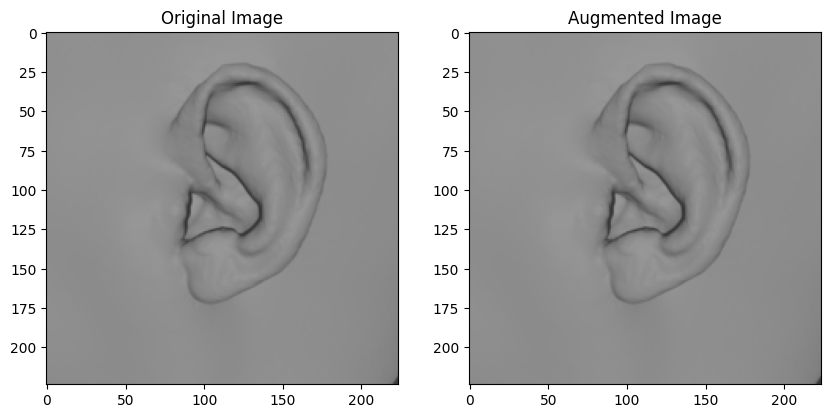

In [17]:
import matplotlib.pyplot as plt

# Plot a sample original and augmented image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(left_ear_images[0].permute(1, 2, 0).numpy())
axes[0].set_title("Original Image")
axes[1].imshow(augmented_images[0].permute(1, 2, 0).numpy())
axes[1].set_title("Augmented Image")
plt.show()


In [20]:
import torch
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.get_device_name(0))  # Should print the name of your GPU


False


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Using device: cpu


<ipython-input-22-8e561267d3ae>:160: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_val_dataset = torch.load(file_path)


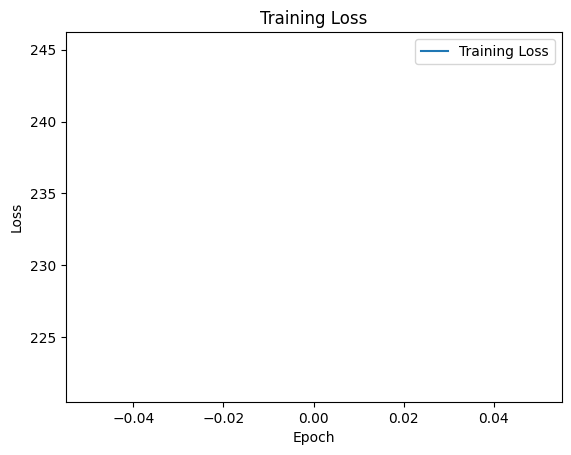

Epoch [1/5]: Training Loss: 233.373134


<Figure size 640x480 with 0 Axes>

Epoch [2/5]: Training Loss: 45.756457


<Figure size 640x480 with 0 Axes>

Epoch [3/5]: Training Loss: 36.626536


<Figure size 640x480 with 0 Axes>

Epoch [4/5]: Training Loss: 35.140495


<Figure size 640x480 with 0 Axes>

Epoch [5/5]: Training Loss: 35.434980
Training completed for all frequencies.


In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset, ConcatDataset
import math
import matplotlib.pyplot as plt
from torchvision.models import resnet18

# Model parameters
d_model = 2048
nhead = 16
dropout = 0.3
lr = 1e-4
weight_decay = 1e-2

desired_freqs = [20000]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=33):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

class CoordinateEmbedding(nn.Module):
    def __init__(self, embedding_dim):
        super(CoordinateEmbedding, self).__init__()
        self.linear = nn.Linear(3, embedding_dim)

    def forward(self, x):
        return self.linear(x)

class Attention(nn.Module):
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        self.attention_weights = nn.Parameter(torch.randn(feature_dim, 1))
        self.scale = 1.0 / (feature_dim ** 0.5)

    def forward(self, x):
        scores = torch.matmul(x, self.attention_weights) * self.scale
        weights = F.softmax(scores, dim=1)
        weighted_sequence = x * weights
        aggregated = torch.sum(weighted_sequence, dim=1)
        return aggregated

class CombinedModel(nn.Module):
    def __init__(self, input_dim=3, num_encoder_layers=1):
        super(CombinedModel, self).__init__()
        self.landmark_embedding = CoordinateEmbedding(d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        self.attention = Attention(d_model)

        # Image processing
        self.resnet = resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, d_model)

        # Combine landmark and image features
        self.combine_features = nn.Linear(d_model * 2, d_model)
        self.dropout = nn.Dropout(dropout)
        self.linear_out = nn.Linear(d_model, 393)  # Assuming output size is 393

    def forward(self, landmarks, images):
        # Process landmarks
        landmarks = landmarks.squeeze(1)  # Remove the unnecessary dimension
        landmarks = landmarks.permute(0, 2, 1)  # Change to shape [batch_size, seq_len, feature_dim]
        x_landmarks = self.landmark_embedding(landmarks)
        x_landmarks = self.pos_encoder(x_landmarks)
        x_landmarks = self.transformer_encoder(x_landmarks)
        x_landmarks = self.attention(x_landmarks)

        # Process images
        x_images = self.resnet(images)

        # Combine features
        combined = torch.cat((x_landmarks, x_images), dim=1)
        x = self.combine_features(combined)
        x = self.dropout(x)
        x = self.linear_out(x)

        return x

def mse_loss(output, target, focus_scale=2, reduction='mean', epsilon=1e-8):
    basic_error = output - target
    error_magnitude = (basic_error + epsilon).abs() ** focus_scale

    if reduction == 'mean':
        return torch.mean(error_magnitude)
    elif reduction == 'sum':
        return torch.sum(error_magnitude)
    else:
        return error_magnitude

def final_train_model(model, train_loader, epochs, optimizer):
    plt.ion()
    fig, ax = plt.subplots()
    train_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for landmarks, images, labels in train_loader:
            landmarks, images, labels = landmarks.to(device), images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(landmarks, images)
            loss = mse_loss(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        ax.clear()
        ax.plot(train_losses, label='Training Loss')
        ax.set_title('Training Loss')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        plt.draw()
        plt.pause(0.05)

        print(f'Epoch [{epoch + 1}/{epochs}]: Training Loss: {avg_loss:.6f}')

    plt.ioff()
    torch.save(model.state_dict(), model_save_path)

def add_gaussian_noise(landmarks, mean=0, std=0.01):
    noise = np.random.normal(mean, std, landmarks.shape)
    noised_landmarks = landmarks.copy()
    noised_landmarks += noise
    return noised_landmarks

for desired_freq in desired_freqs:
    model_save_path = f"drive/MyDrive/HRIRs/Model/combined_model_L_{desired_freq/1000}k.pth"
    model = CombinedModel().to(device)

    file_path = f"drive/MyDrive/HRIRs/Data/Processed/train_val_norm_L{desired_freq/1000}k_with_images.pth"
    train_val_dataset = torch.load(file_path)

    # train_val_dataset = torch.load(f"drive/MyDrive/HRIRs/Data/Processed/train_val_norm_L{desired_freq/1000}k_with_images.pth")

    # Data augmentation with noised landmarks
    train_landmarks, train_images, train_labels = zip(*train_val_dataset)
    train_landmarks = torch.stack(train_landmarks).numpy()

    noised_train_landmarks = np.zeros_like(train_landmarks)
    for idx, landmarks in enumerate(train_landmarks):
        noised_train_landmarks[idx] = add_gaussian_noise(landmarks)
    noised_train_landmarks = torch.tensor(noised_train_landmarks).float()

    noised_train_subset = TensorDataset(noised_train_landmarks, torch.stack(train_images), torch.stack(train_labels))
    train_combined = ConcatDataset([train_val_dataset, noised_train_subset])

    # Create another noised subset
    noised_train_landmarks = np.zeros_like(train_landmarks)
    for idx, landmarks in enumerate(train_landmarks):
        noised_train_landmarks[idx] = add_gaussian_noise(landmarks)
    noised_train_landmarks = torch.tensor(noised_train_landmarks).float()
    noised_train_subset = TensorDataset(noised_train_landmarks, torch.stack(train_images), torch.stack(train_labels))
    train_combined = ConcatDataset([train_combined, noised_train_subset])

    train_combined_loader = DataLoader(train_combined, batch_size=16, shuffle=True)

    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    final_train_model(model, train_combined_loader, epochs=5, optimizer=optimizer)

print("Training completed for all frequencies.")

Using device: cpu
Using device: cpu

Testing model for 20.0k Hz


<ipython-input-32-c078d3c2ed31>:123: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))
<ipython-input-32-c078d

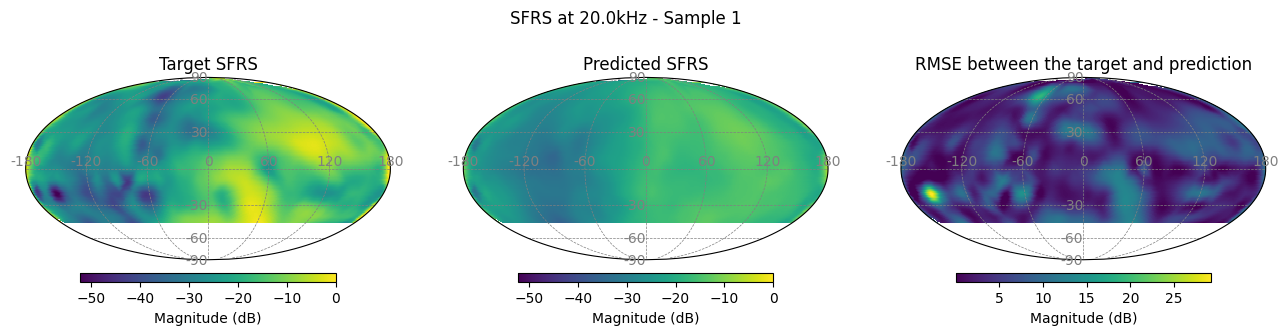

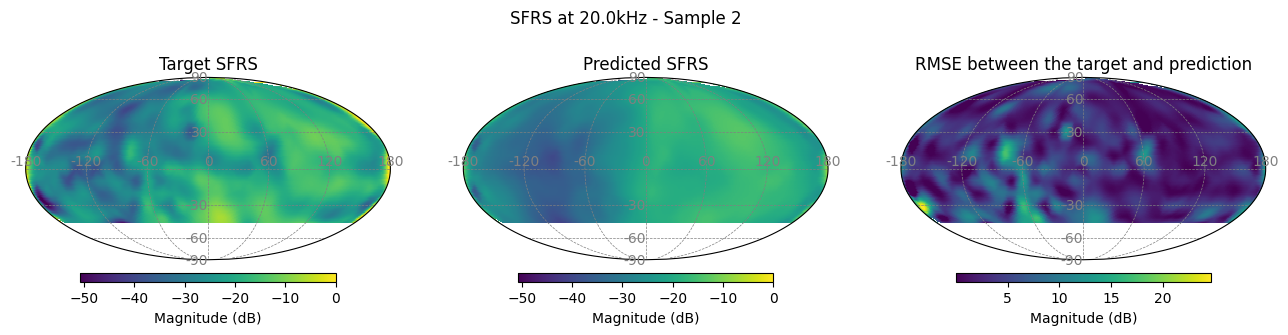

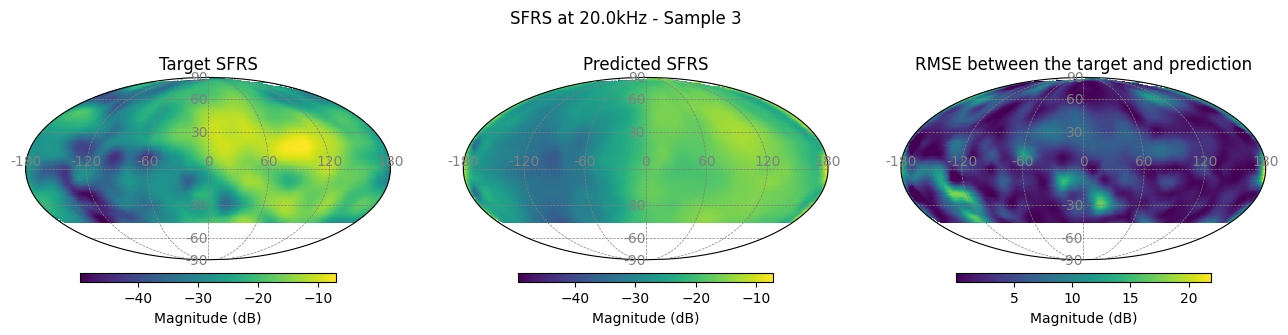

Average RMSE: 5.0174
Average NRMSE: 0.1324
Average Accuracy: 0.8676


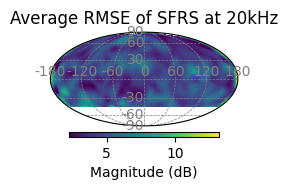


Overall Average Accuracy: 0.8676


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from scipy.interpolate import griddata
import scipy.io
import math
from torchvision.models import resnet18

# Model definition
# Model parameters
d_model = 2048
nhead = 16
dropout = 0.3
lr = 1e-4
weight_decay = 1e-2
#desired_freqs = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
desired_freqs = [20000]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=33):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

class CoordinateEmbedding(nn.Module):
    def __init__(self, embedding_dim):
        super(CoordinateEmbedding, self).__init__()
        self.linear = nn.Linear(3, embedding_dim)

    def forward(self, x):
        return self.linear(x)

class Attention(nn.Module):
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        self.attention_weights = nn.Parameter(torch.randn(feature_dim, 1))
        self.scale = 1.0 / (feature_dim ** 0.5)

    def forward(self, x):
        scores = torch.matmul(x, self.attention_weights) * self.scale
        weights = F.softmax(scores, dim=1)
        weighted_sequence = x * weights
        aggregated = torch.sum(weighted_sequence, dim=1)
        return aggregated

class CombinedModel(nn.Module):
    def __init__(self, input_dim=3, num_encoder_layers=1):
        super(CombinedModel, self).__init__()
        self.landmark_embedding = CoordinateEmbedding(d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        self.attention = Attention(d_model)

        # Image processing
        self.resnet = resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, d_model)

        # Combine landmark and image features
        self.combine_features = nn.Linear(d_model * 2, d_model)
        self.dropout = nn.Dropout(dropout)
        self.linear_out = nn.Linear(d_model, 393)  # Assuming output size is 393

    def forward(self, landmarks, images):
        # Process landmarks
        landmarks = landmarks.squeeze(1)  # Remove the unnecessary dimension
        landmarks = landmarks.permute(0, 2, 1)  # Change to shape [batch_size, seq_len, feature_dim]
        x_landmarks = self.landmark_embedding(landmarks)
        x_landmarks = self.pos_encoder(x_landmarks)
        x_landmarks = self.transformer_encoder(x_landmarks)
        x_landmarks = self.attention(x_landmarks)

        # Process images
        x_images = self.resnet(images)

        # Combine features
        combined = torch.cat((x_landmarks, x_images), dim=1)
        x = self.combine_features(combined)
        x = self.dropout(x)
        x = self.linear_out(x)

        return x

def mse_loss(output, target, focus_scale=2, reduction='mean', epsilon=1e-8):
    basic_error = output - target
    error_magnitude = (basic_error + epsilon).abs() ** focus_scale
    if reduction == 'mean':
        return torch.mean(error_magnitude)
    elif reduction == 'sum':
        return torch.sum(error_magnitude)
    else:
        return error_magnitude

# Load azimuth and elevation data
azim_data = scipy.io.loadmat('/content/drive/MyDrive/HRIRs/Parameters/azim.mat')['azim'].squeeze()
elev_data = scipy.io.loadmat('/content/drive/MyDrive/HRIRs/Parameters/elev.mat')['elev'].squeeze()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def load_model(model_path):
    model = CombinedModel().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

def prepare_test_data(test_data_path):
    test_dataset = torch.load(test_data_path)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
    return test_loader

def RMSE_loss(predicted, ground_truth):
    predicted = torch.tensor(predicted, dtype=torch.float32)
    ground_truth = torch.tensor(ground_truth, dtype=torch.float32)
    mse = (predicted - ground_truth) ** 2
    rmse = torch.sqrt(mse)
    return rmse

def plot_sfrs_sphere(ax, azimuths, elevations, hrtf_data, title, vmin, vmax):
    target_azimuths = np.linspace(-180, 180, 360)
    target_elevations = np.linspace(-90, 90, 180)
    target_grid_azimuths, target_grid_elevations = np.meshgrid(target_azimuths, target_elevations)

    xi, yi = np.degrees(azimuths), np.degrees(elevations)
    zi = griddata((xi.flatten(), yi.flatten()), hrtf_data.flatten(),
                  (target_grid_azimuths, target_grid_elevations), method='cubic')

    pcm = ax.pcolormesh(target_grid_azimuths, target_grid_elevations, zi,
                        cmap='viridis', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), shading='auto')

    cbar = plt.colorbar(pcm, orientation='horizontal', pad=0.05, aspect=30, shrink=0.7, ax=ax)
    cbar.set_label('Magnitude (dB)')

    for az_deg in [-180, -120, -60, 0, 60, 120, 180]:
        ax.text(az_deg, 0, f'{az_deg}',
                verticalalignment='bottom', horizontalalignment='center',
                transform=ccrs.Geodetic(), color='grey')

    for el_deg in [-90, -60, -30, 30, 60, 90]:
        ax.text(0, el_deg, f'{el_deg}',
                verticalalignment='center', horizontalalignment='right',
                transform=ccrs.Geodetic(), color='grey')

    ax.gridlines(color='gray', linestyle='--', linewidth=0.5)
    ax.set_global()
    ax.set_title(title)

def plot_hrtf_comparison(azimuths, elevations, ground_truth, predicted, title):
    all_data = np.concatenate([ground_truth.flatten(), predicted.flatten()])
    vmin, vmax = np.min(all_data), np.max(all_data)

    fig = plt.figure(figsize=(16, 3.5))
    projection = ccrs.Mollweide()

    # Ground Truth
    ax1 = fig.add_subplot(131, projection=projection)
    plot_sfrs_sphere(ax1, azimuths, elevations, ground_truth, "Target SFRS", vmin, vmax)

    # Prediction
    ax2 = fig.add_subplot(132, projection=projection)
    plot_sfrs_sphere(ax2, azimuths, elevations, predicted, "Predicted SFRS", vmin, vmax)

    rmse = np.array(RMSE_loss(predicted, ground_truth))
    emin, emax = np.min(rmse), np.max(rmse)
    ax3 = fig.add_subplot(133, projection=projection)
    plot_sfrs_sphere(ax3, azimuths, elevations, rmse, "RMSE between the target and prediction", emin, emax)

    plt.suptitle(title)
    plt.show()


def plot_average_rmse(rmse_per_freq):
    fig = plt.figure(figsize=(16, 7))
    projection = ccrs.Mollweide()
    emin = np.min(rmse_per_freq)
    emax = np.max(rmse_per_freq)

    for idx, rmse in enumerate(rmse_per_freq):
        ax = fig.add_subplot(2, 3, idx+1, projection=projection)
        plot_sfrs_sphere(ax, azim_data, elev_data, rmse, f"Average RMSE of SFRS at {int(desired_freqs[idx]/1000)}kHz", emin, emax)

    plt.show()

def plot_overall_average_rmse(rmse_per_freq):
    fig = plt.figure(figsize=(16, 7))
    projection = ccrs.Mollweide()
    emin = np.min(rmse_per_freq)
    emax = np.max(rmse_per_freq)

    for idx, rmse in enumerate(rmse_per_freq):
        ax = fig.add_subplot(4, 5, idx+1, projection=projection)
        plot_sfrs_sphere(ax, azim_data, elev_data, rmse, f"Average RMSE of SFRS at {int(desired_freqs[idx]/1000)}kHz", emin, emax)

    plt.show()



def calculate_nrmse(predicted, actual):
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))
    range_actual = np.max(actual) - np.min(actual)
    nrmse = rmse / range_actual
    return nrmse

def test_model(model, test_loader, desired_freq):
    rmse_all = []
    nrmse_all = []
    accuracy_all = []
    with torch.no_grad():
        for i, (landmarks, images, labels) in enumerate(test_loader):
            landmarks, images, labels = landmarks.to(device), images.to(device), labels.to(device)
            prediction = model(landmarks, images).squeeze(0).cpu().numpy()
            labels_np = labels.squeeze(0).cpu().numpy()

            rmse = RMSE_loss(prediction, labels_np)
            rmse_all.append(rmse)

            nrmse = calculate_nrmse(prediction, labels_np)
            nrmse_all.append(nrmse)

            accuracy = 1 - nrmse
            accuracy_all.append(accuracy)

            if i < 3:  # Plot the first 3 samples
                title = f"SFRS at {desired_freq/1000}kHz - Sample {i+1}"
                plot_hrtf_comparison(azim_data, elev_data, labels_np, prediction, title)

    rmse_mean = np.mean(rmse_all, axis=0)
    nrmse_mean = np.mean(nrmse_all)
    accuracy_mean = np.mean(accuracy_all)

    print(f"Average RMSE: {np.mean(rmse_mean):.4f}")
    print(f"Average NRMSE: {nrmse_mean:.4f}")
    print(f"Average Accuracy: {accuracy_mean:.4f}")

    return rmse_mean, nrmse_mean, accuracy_mean

def main():
    rmse_per_freq = []
    accuracy_per_freq = []

    for desired_freq in desired_freqs:
        print(f"\nTesting model for {desired_freq/1000}k Hz")

        model_path = f"/content/drive/MyDrive/HRIRs/Model/combined_model_L_{desired_freq/1000}k.pth"
        test_data_path = f"/content/drive/MyDrive/HRIRs/Data/Processed/test_norm_L{desired_freq/1000}k_with_images.pth"

        model = load_model(model_path)
        test_loader = prepare_test_data(test_data_path)

        rmse_mean, nrmse_mean, accuracy_mean = test_model(model, test_loader, desired_freq)
        rmse_per_freq.append(rmse_mean)
        accuracy_per_freq.append(accuracy_mean)

    # plot_average_rmse(rmse_per_freq)
    plot_overall_average_rmse(rmse_per_freq)
    # 打印所有频率的平均准确率
    overall_accuracy = np.mean(accuracy_per_freq)
    print(f"\nOverall Average Accuracy: {overall_accuracy:.4f}")

if __name__ == "__main__":
    main()